# Langevin integrator with WCA potential

Simple implementation of two particles following Langevin dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import msmrd2
import msmrd2.visualization as msmrdvis
from msmrd2.integrators import langevin 
from msmrd2.potentials import WCA

Failed to import pyEVTK, export2visit functions will not work


In [2]:
# Define arbitrarily large list of particles
np.random.seed(seed=1)
numparticles = 500
boxsize = 25
D = 0.1
mass = 1.0
velocity = np.zeros(3)
pyPartlist = [] 
for i in range(numparticles):
    overlap = True
    while overlap:
        position = np.array([boxsize*np.random.rand()-0.5*boxsize,
                             boxsize*np.random.rand()-0.5*boxsize,
                             boxsize*np.random.rand()-0.5*boxsize])
        overlap = False     
        for j in range(len(pyPartlist)):
            if np.linalg.norm(position - pyPartlist[j].position) < 2.0:
                overlap = True
                continue
                
    part = msmrd2.particle(D, position, velocity, mass)
    pyPartlist.append(part)

In [3]:
# Create list of particles that can be read from msmrd
# note the particles in this list will be independent from the python list.
partlist = msmrd2.integrators.particleList(pyPartlist)

In [4]:
# Over-damped Langevin integrator definition
dt = 0.0005
seed = -1 # Seed = -1 used random device as seed
bodytype = 'point'
integrator = langevin(dt, seed, bodytype) 

In [5]:
# Define boundary (choose either spherical or box)
boxBoundary = msmrd2.box(boxsize,boxsize,boxsize,'periodic')
#boxBoundary = msmrd2.box(boxsize,boxsize,boxsize,'reflective')
integrator.setBoundary(boxBoundary)

In [6]:
# Define Lennard-Jones potential (rm=2^(1/6)sigma)
epsilon = 1.0
rm = 1.0
sigma = rm * 2**(-1/6)
potentialWCA = WCA(epsilon, sigma)
integrator.setPairPotential(potentialWCA)

In [7]:
# Integrate the particles, save to .xyz to produce VMD output (additional overhead)
timesteps = 200000
stride = 20
datafile  = open('../../data/vmd/langevinWCA.xyz', 'w')
for i in range(timesteps):
    if i%stride == 0:
        datafile.write(str(len(partlist)) + '\n')
        datafile.write(str(0) + '\n')
    for j, part in enumerate(partlist):
        if i%stride == 0:
            v0 = part.position
            datafile.write('type_0' + ' ' + ' '.join(map(str, v0)) + '\n')
    integrator.integrate(partlist)
    if i%1000 == 0:
        print("Percentage complete: ", 100*i/timesteps, "%", end="\r")
datafile.close()
print("Percentage complete: ", 100, " %")

Percentage complete:  100  %


In [8]:
# Generate TCL script to visualize with VMD
msmrdvis.generateTCL_sphericalParticles(numparticles = numparticles, outfname = "langevinWCA", 
                              tclfname = "../../data/vmd/langevinWCA_2vmd.tcl")

To load the movie go to /data/vmd and run in a terminal "vmd -e langevinLennardJones_2vmd.tcl".


## In case VMD is not desired

In case VMD output is not desired, below we simply integrate the model and show the output directly.

In [9]:
# Integrate particle list and print only positions (prints positions and orientations of both particles)
timesteps = 100
print('{:<10s}{:<15s}{:<40s}{:<40s}'.format("Iteration", "Time", "Positions", "Velocites"))
for i in range(timesteps):
    print('{:<10d}{:<10f}{:<40s}{:<50s}'.format(i, integrator.clock, str(partlist[0].position), str(partlist[0].velocity)))
    print('{:<10s}{:<10s}{:<40s}{:<50s}'.format(str(" "), str(" "), str(partlist[1].position), str(partlist[1].velocity)))
    integrator.integrate(partlist)

Iteration Time           Positions                               Velocites                               
0         100.000000[  0.42809468   3.65997266 -10.37536422][ 0.19513591 -0.18824145 -1.64016208]             
                    [ -0.46419401 -10.02064718 -12.11023387][ 0.8137655   0.69096922 -1.35578348]             
1         100.000500[  0.42821821   3.65988148 -10.37621099][ 0.29898739 -0.17648374 -1.74688915]             
                    [ -0.46378557 -10.02029821 -12.11092609][ 0.82001475  0.7048955  -1.41311348]             
2         100.001000[  0.42836246   3.65978601 -10.37707961][ 0.27801059 -0.20540749 -1.72760175]             
                    [ -0.46335098 -10.01995468 -12.11163679][ 0.9183296   0.66923688 -1.42967418]             
3         100.001500[  0.42852311   3.659705   -10.37790118][ 0.36461242 -0.11864998 -1.55866973]             
                    [ -0.4628982  -10.01962321 -12.11237121][ 0.89276806  0.65661477 -1.50802871]             
4     

57        100.028500[  0.41654265   3.65067148 -10.41770916][-0.89472002  0.13804864 -1.70519737]             
                    [ -0.43103579 -10.00308632 -12.15930665][ 1.64677404  0.68774189 -1.90492123]             
58        100.029000[  0.41610316   3.6507535  -10.41855368][-0.86324363  0.19002577 -1.67289642]             
                    [ -0.43019362 -10.00270638 -12.16025734][ 1.72191731  0.83202872 -1.897843  ]             
59        100.029500[  0.41565057   3.65084472 -10.41934318][-0.94713465  0.17485791 -1.48511718]             
                    [ -0.42934339 -10.00227455 -12.16115193][ 1.67898112  0.89531461 -1.68050828]             
60        100.030000[  0.41518567   3.6509272  -10.42009401][-0.91244332  0.15507783 -1.51817562]             
                    [ -0.42853035 -10.0017759  -12.16198512][ 1.57320026  1.09925893 -1.65223621]             
61        100.030500[  0.41472842   3.65099112 -10.42083749][-0.91656438  0.10060183 -1.45574045]             
 

97        100.048500[  0.39689052   3.66079834 -10.43607861][-0.98968031  0.67518576 -0.2822197 ]             
                    [ -0.41624521  -9.98801349 -12.18784424][-0.04674347  1.03253076 -1.20000937]             
98        100.049000[  0.39637398   3.6611332  -10.43621465][-1.07649856  0.66426031 -0.26194803]             
                    [ -0.41626148  -9.98750368 -12.18843373][-0.01832527  1.00669949 -1.15794556]             
99        100.049500[  0.3958386    3.66145975 -10.43637158][-1.06499876  0.64196295 -0.36576988]             
                    [ -0.4162456   -9.98701538 -12.18900797][ 0.08184601  0.94651344 -1.13902891]             


# Calculate and plot potential

Plots the Lennard jones potential for a set of given parameters:

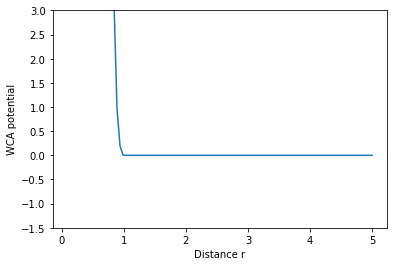

In [10]:
# Redefine potential
epsilon = 1
rm = 1.0
sigma = rm * 2**(-1/6)
cutOff = 5
potentialWCA = WCA(epsilon, sigma)

# Construct evaluate function
def WCAevaluate(r):
    p1 = np.zeros(3)
    p2 = np.array([r,0,0])
    vel = np.zeros(3)
    part1 = msmrd2.particle(1.0, p1, vel, 1)
    part2 = msmrd2.particle(1.0, p2, vel, 1)
    return potentialWCA.evaluate(part1, part2)

rarray = np.linspace(0.1,5,100)
V_WCA = [WCAevaluate(r) for r in rarray]
plt.plot(rarray, V_WCA)
plt.xlabel("Distance r")
plt.ylabel("WCA potential")
plt.ylim([-1.5,3])
plt.show()